# Analise exploratória do dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder


In [6]:
df = pd.read_csv('../dataset/heart-failure.csv')

df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
# Checar valores únicos em colunas categóricas
print(df['Sex'].unique())
print(df['ChestPainType'].unique())
print(df['RestingECG'].unique())
print(df['ExerciseAngina'].unique())
print(df['ST_Slope'].unique())


['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']


In [10]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [11]:
# Contagem de linhas das colunas RestingBP e Cholesterol com valor 0
print('RestingBP: ', (df['RestingBP'] == 0).sum())
print('Cholesterol: ', (df['Cholesterol'] == 0).sum())


RestingBP:  1
Cholesterol:  172


In [12]:
# Obater apenas os valores válidos (maiores que 0) para saber a mediana
colesterol_validos = df[df['Cholesterol'] > 0]['Cholesterol']
restingbp_validos = df[df['RestingBP'] > 0]['RestingBP']

# Calular a mediana dos valores válidos
mediana_colesterol = colesterol_validos.median()
mediana_restingbp = restingbp_validos.median()

print('Mediana Colesterol: ', mediana_colesterol)
print('Mediana RestingBP: ', mediana_restingbp)

Mediana Colesterol:  237.0
Mediana RestingBP:  130.0


In [13]:
# Substitui os valores 0 pela mediana
df['Cholesterol'] = df['Cholesterol'].replace(0, mediana_colesterol)

df['RestingBP'] = df['RestingBP'].replace(0, mediana_restingbp)
print(df.shape)
df.describe() 

(918, 12)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.538126,243.204793,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.990127,53.401297,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [14]:
# Verificar outliers usando o método do IQR (Intervalo Interquartil)
features = ['Age', 'RestingBP', 'Cholesterol',  'MaxHR', 'Oldpeak']

features_limits = {}

for feature in features:
    q1 = np.percentile(df[feature], 25)
    q3 = np.percentile(df[feature], 75)
    iqr = q3 - q1

    print(f"{feature} Q1: {q1}, Q3: {q3}, IQR: {iqr}")
    # Limite inferior e superior
    limite_inf = q1 - 1.5 * iqr
    limite_sup = q3 + 1.5 * iqr

    # Fora desse intervalo é um outlier
    print(limite_inf, limite_sup)
    print('-------------\n')

    features_limits[feature] = {'inf': float(limite_inf), 'sup': float(limite_sup)}

Age Q1: 47.0, Q3: 60.0, IQR: 13.0
27.5 79.5
-------------

RestingBP Q1: 120.0, Q3: 140.0, IQR: 20.0
90.0 170.0
-------------

Cholesterol Q1: 214.0, Q3: 267.0, IQR: 53.0
134.5 346.5
-------------

MaxHR Q1: 120.0, Q3: 156.0, IQR: 36.0
66.0 210.0
-------------

Oldpeak Q1: 0.0, Q3: 1.5, IQR: 1.5
-2.25 3.75
-------------



In [15]:
for feature in features:
    outliers = df[(df[feature] < features_limits[feature]['inf']) |
                  (df[feature] > features_limits[feature]['sup'])]
    print(f"Outliers em {feature}: {len(outliers)} linhas")

Outliers em Age: 0 linhas
Outliers em RestingBP: 27 linhas
Outliers em Cholesterol: 41 linhas
Outliers em MaxHR: 2 linhas
Outliers em Oldpeak: 16 linhas


In [16]:
# Codificação de variáveis categóricas
df = df.copy()
for col in df.select_dtypes(include="object").columns:
    df[col] = LabelEncoder().fit_transform(df[col])

df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


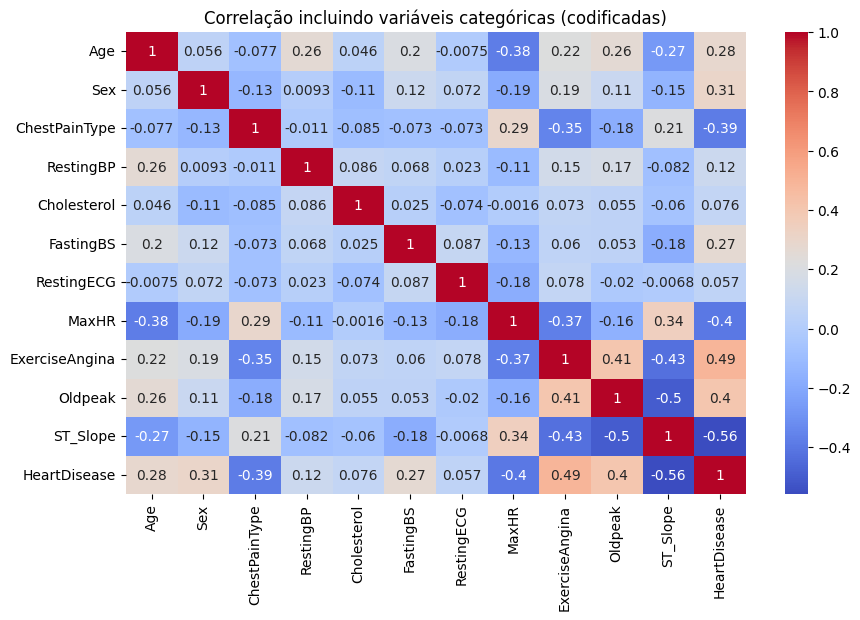

In [17]:
# Mapa de calor (heatmap) com variáveis categóricas codificadas
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlação incluindo variáveis categóricas (codificadas)")
plt.show()

In [18]:
corr = df.corr()["HeartDisease"].sort_values(ascending=False)
print(corr)


HeartDisease      1.000000
ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.117798
Cholesterol       0.076114
RestingECG        0.057384
ChestPainType    -0.386828
MaxHR            -0.400421
ST_Slope         -0.558771
Name: HeartDisease, dtype: float64


In [20]:
# Salvar o dataframe tratado
df = df[['ExerciseAngina', 'Oldpeak', 'ST_Slope', 'MaxHR', 'ChestPainType', 'HeartDisease']]
df.to_csv('../dataset/heart-failure-tratado.csv', index=False)

df

,ExerciseAngina,Oldpeak,ST_Slope,MaxHR,ChestPainType,HeartDisease
0,0,0.0,2,172,1,0
1,0,1.0,1,156,2,1
2,0,0.0,2,98,1,0
3,1,1.5,1,108,0,1
4,0,0.0,2,122,2,0
...,...,...,...,...,...,...
913,0,1.2,1,132,3,1
914,0,3.4,1,141,0,1
915,1,1.2,1,115,0,1
916,0,0.0,1,174,1,1
